In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,timedelta
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [2]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def exponential_model(x,a,b,c):
    #return a*np.exp(b*(x-c))
    return a * b**(x+c)

url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

df = df.loc[:,['data','totale_casi']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-24 00:00:00", FMT)).days)

x = df.data
y = df.totale_casi

fit = curve_fit(exponential_model,x,y,p0=[100,1,1000])
#fit = curve_fit(logistic_model, x, y, p0=[2,100,20000])

In [3]:
fit[0]

array([2.35841165e-08, 1.16465521e+00, 1.61028727e+02])

Text(0, 0.5, 'cases')

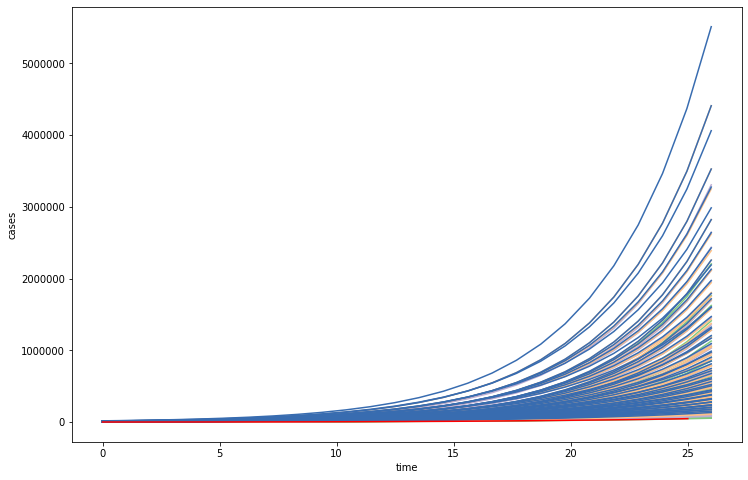

In [23]:
plt.figure(figsize=(12,8))

x = np.linspace(0, len(df.data), len(df.data))
color_wheel = ['#7fc97f','#beaed4','#fdc086','#386cb0','#ffff99']

a = y[0]
country_coef = [2,3,4,5]
time_delay   = np.arange(8,13,1)
growth_rate  = np.arange(1.15, 1.25, .01)

adam = np.zeros((len(country_coef), len(time_delay), len(growth_rate), len(df.data)))

for c, coef in enumerate(country_coef):
    for t, days in enumerate(time_delay):
        for b, rate in enumerate(growth_rate):
            adam[c, t, b, :] = exponential_model(x, coef*a , rate, days)
            plt.plot(x, adam[c, t, b, :], color_wheel[c])

x = df.data
y = df.totale_casi
plt.plot(x, y, 'r', 2, label='Italy')

plt.xlabel('time')
plt.ylabel('cases')
#plt.yscale('log')

Text(0, 0.5, 'cases')

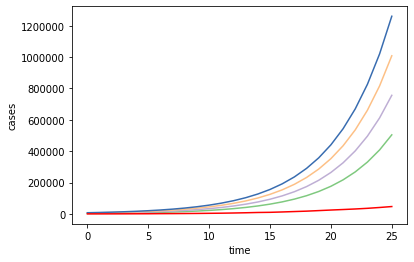

In [24]:
bob = np.mean(adam, axis=(1,2))
for c, coef in enumerate(country_coef):
    plt.plot(x, bob[c, :], color_wheel[c])
            
            
plt.plot(df.data, df.totale_casi, 'r', 2, label='Italy')

plt.xlabel('time')
plt.ylabel('cases')

Text(0, 0.5, 'cases')

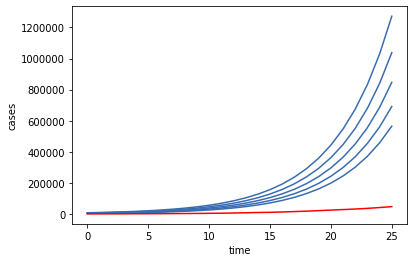

In [26]:
bob = np.mean(adam, axis=(0,2))
for t, days in enumerate(time_delay):
    plt.plot(x, bob[t, :], color_wheel[c])
            
            
plt.plot(df.data, df.totale_casi, 'r', 2, label='Italy')

plt.xlabel('time')
plt.ylabel('cases')

Text(0, 0.5, 'cases')

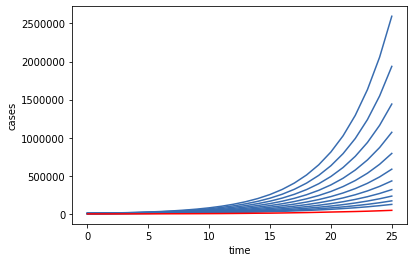

In [27]:
bob = np.mean(adam, axis=(0,1))
for b, rate in enumerate(growth_rate):
    plt.plot(x, bob[b, :], color_wheel[c])

    
plt.plot(df.data, df.totale_casi, 'r', 2, label='Italy')

plt.xlabel('time')
plt.ylabel('cases')

Text(0, 0.5, 'cases')

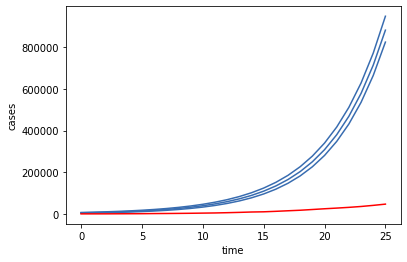

In [28]:
bob = np.mean(adam, axis=(0,1,2))
lb = np.percentile(adam, .25, axis=(0,1,2))
ub = np.percentile(adam, .75, axis=(0,1,2))

plt.plot(x, bob, color_wheel[c])
plt.plot(x, bob - lb, color_wheel[c])
plt.plot(x, bob + ub, color_wheel[c])
    
plt.plot(df.data, df.totale_casi, 'r', 2, label='Italy')

plt.xlabel('time')
plt.ylabel('cases')

In [17]:
bob

array([  4290.52634442,   5220.09871712,   6355.60776905,   7743.59479187,
         9441.30492129,  11519.18644269,  14063.98131079,  17182.54829758,
        21006.59432986,  25698.53203713,  31458.7343407 ,  38534.52261426,
        47231.3067035 ,  57926.39685595,  71086.13430935,  87287.14506335,
       107242.71788416, 131835.55243687, 162158.42855195, 199564.72792751,
       245731.21367165, 302736.0642599 , 373155.8957755 , 460186.42601023,
       567792.5814831 , 700895.28035395])